In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns 

In [2]:
day = pd.read_csv('D:\COURS-EFREI M1\Machine Learning\Bike sharing\day.csv')
hour = pd.read_csv('D:\COURS-EFREI M1\Machine Learning\Bike sharing\hour.csv')

In [3]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
day.drop(labels = ['casual','registered','atemp','dteday'] , axis = 1 , inplace = True)
hour.drop(labels = ['casual','registered','atemp','dteday'] , axis = 1 , inplace = True)

In [9]:
hour.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,2,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,3,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,4,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,5,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


mean rentals in fall : 236.01623665480426


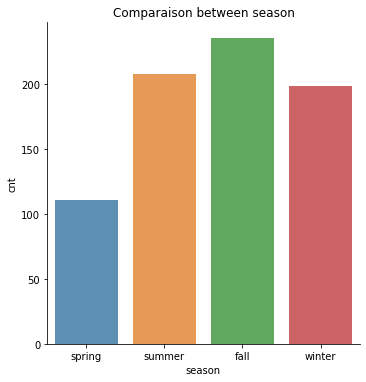

In [10]:
sns.catplot(data = hour.replace({'season':{1:'spring' , 2:'summer' , 3:'fall' , 4:'winter'}} , inplace = False), 
x = 'season' , y = 'cnt' , kind = 'bar' , ci = None ,  alpha = 0.8)

plt.title('Comparaison between season')

print( "mean rentals in fall :", hour[hour['season'] == 3]['cnt'].mean())

We can see that bikes are more use in fall

Text(17.5, 580, 'x = 17')

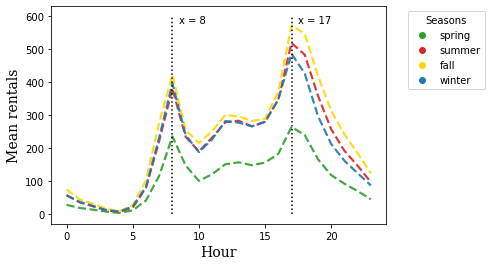

In [11]:
from matplotlib.lines import Line2D

legend_dict = {'spring':'tab:green' , 'summer':'tab:red' , 'fall':'gold' , 'winter':'tab:blue'}
line_color = ['tab:green','tab:red','gold','tab:blue']


for i in range(1,5): # we have 4 seasons from 1 to 4
    y = []
    for j in range(24): # also 24 hours from 0 to 23
        y.append(hour[(hour['hr'] == j)&(hour['season'] == i)]['cnt'].mean())
    plt.plot(np.arange(24) , y , alpha = 0.9 , linestyle = '--' , linewidth = 2.2 , color = line_color[i-1])

    
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=l, markersize=8) for l,c in legend_dict.items()]
plt.legend(title='Seasons', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.plot([8,8] , [0,600] , linestyle = ':' , color = "k")
plt.plot([17,17] , [0,600] , linestyle = ':', color = "k")

plt_font = {'family':'serif' , 'size':14}
plt.xlabel('Hour' , fontdict = plt_font)
plt.ylabel('Mean rentals' , fontdict = plt_font)


plt.text(8.5,580,'x = 8')
plt.text(17.5,580,'x = 17')

We can see with this graph that at 8 am and 5 pm the use of bikes are peaking

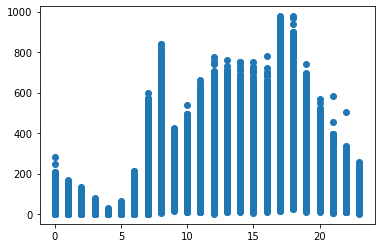

In [38]:
X = hour.iloc[:, 4] #hours
Y = hour.iloc[:, 12] #counts

plt.scatter(X, Y)

plt.show()

# Linear regression with a gradient descent from scrach (1 dimension)  for the hourly demand 

In [39]:
# Building the model
a = 0
b = 0

L = 0.001           # The learning Rate
iteration = 500     # The number of iterations to perform gradient descent
n = len(X)          # Number of elements in X

# Performing Gradient Descent 
for i in range(iteration): 
    
    Y_pred = a*X + b  # The current predicted value of Y
    
    D_a = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt a
    D_b = (-2/n) * sum(Y - Y_pred)  # Derivative wrt b
    
    a = a - L * D_a  # Update a
    b = b - L * D_b  # Update b
    
print (a, b)

13.731829995883245 16.93021019414093


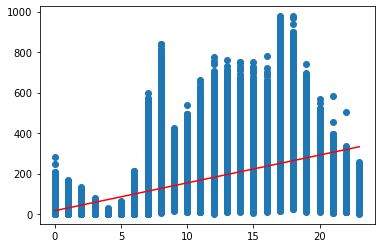

In [14]:
Y_pred = a*X + b

plt.scatter(X, Y) 


plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error

me = np.sqrt(mean_squared_error(Y, Y_pred))
print(me) #We can see that's is a very bad model 

correlation_matrix = np.corrcoef(X, Y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

168.92754912897863
0.15529234536489225


# Linear regression with a gradient descent from scrach (multi dimension)  for the hourly demand 

In [46]:
m = hour['cnt'].values.size

def cost_function(X, Y, theta):
    y_pred = np.dot(X, theta)
    sqrd_error = (y_pred - y ) ** 2
    cost = 1/ (2 * m) * np.sum(sqrd_error)
    return cost

In [59]:
theta = np.zeros((17379,))
cost_function(X, Y, theta)

40.05957504069408

In [62]:
def gradient_descent(X, Y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X, theta)
        der = np.dot(X.transpose(), (y_pred - y)) / m
        theta -= alpha * der 
        costs.happend(cost_function(X, Y, theta))
        
        return theta, costs

In [63]:
theta, costs = gradient_descent(X, Y, theta, alpha=0.000068, iterations=400000)

ValueError: shapes (17379,) and (24,) not aligned: 17379 (dim 0) != 24 (dim 0)

# Model with sklearn 

## Linear regression 

In [16]:
X = hour.values[:,2:11] 
Y = hour.values[:,12] #count values

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , Y)
#Splitting the data for a test set and a train set 

print("x_train ->" , x_train.shape)
print("y_train ->" , y_train.shape)
print("x_test ->" , x_test.shape)
print("y_test ->" , y_test.shape)

x_train -> (13034, 9)
y_train -> (13034,)
x_test -> (4345, 9)
y_test -> (4345,)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
#We are using the linear regression 

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)

score = model.score(x_test, y_test)
print("score:", score)

r2 = r2_score(y_test, y_pred_test)
print("r2:", r2)

MSE : 20069.14923556307
score: 0.37359504462256377
r2: 0.37359504462256377


## Linear regression + preprocessing (PolynomialFeatures)

In [31]:
from sklearn.preprocessing import PolynomialFeatures

preprocess2= PolynomialFeatures(degree = 2)

x_train_pow2 = preprocess2.fit_transform(x_train)
x_test_pow2 = preprocess2.fit_transform(x_test)
#We are preprocessing the data 
#In this case we are elevating the values of X to the power 2

model.fit(x_train_pow2, y_train)

y_pred_train_pow2 = model.predict(x_train_pow2) 
y_pred_test_pow2 = model.predict(x_test_pow2)

mse = mean_squared_error(y_train, y_pred_train_pow2)
print("MSE :", mse)

score_of_pow2 = model.score(x_test_pow2, y_test)
print("score:", score_of_pow2)

r2 = r2_score(y_test, y_pred_test_pow2)
print("r2:", r2)

MSE : 14923.80221795268
score: 0.5392726077526921
r2: 0.5392726077526921


In [33]:
preprocess3= PolynomialFeatures(degree = 3)

x_train_pow3 = preprocess3.fit_transform(x_train)
x_test_pow3 = preprocess3.fit_transform(x_test)
#We are preprocessing the data 
#In this case we are elevating the values of X to the power 3

model.fit(x_train_pow3, y_train)

y_pred_train_pow3 = model.predict(x_train_pow3) 
y_pred_test_pow3 = model.predict(x_test_pow3)

mse = mean_squared_error(y_train, y_pred_train_pow3)
print("MSE :", mse)

score_of_pow3 = model.score(x_test_pow3, y_test)
print("score:", score_of_pow3)

r2 = r2_score(y_test, y_pred_test_pow3)
print("r2:", r2)

MSE : 12053.111482265876
score: 0.6199638091556172
r2: 0.6199638091556172
